** Plotting a Randome Plot **

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
x = np.random.randint(0, 30, 10)
y = np.random.randint(0, 55, 10)

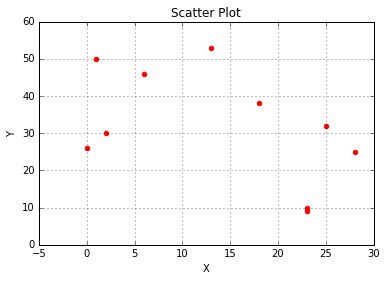

In [3]:
plt.figure()
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y, color='red')
plt.grid(True, color='0')
plt.autoscale(True)
plt.show()

In [4]:
# import
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# generating some nos
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

** Plotting**

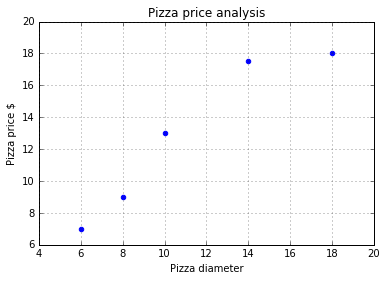

In [6]:
# creating figure
plt.figure(figsize=(6, 4), dpi=120)
#plt.plot(x, Y, color='blue')
plt.scatter(X, y, color='blue')
plt.xlabel("Pizza diameter")
plt.ylabel("Pizza price $")
plt.title("Pizza price analysis")
#plt.xlim(0, 30)
#plt.ylim(0, 30)
plt.grid(True, color='0.2')
plt.autoscale(True)

** Using linear Regression to predict the pizza price **

In [7]:
from sklearn.linear_model import LinearRegression

lReg = LinearRegression()
lReg.fit(X, y)

# predict the price of 16" pizza
print("16' pizza price : ", lReg.predict([16])[0])

# getting coefficeint & intercept
print("Coeff : ", lReg.coef_, 
     "\nIntercept : ", lReg.intercept_)


16' pizza price :  [ 17.5862069]
Coeff :  [[ 0.9762931]] 
Intercept :  [ 1.96551724]


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


**Checking RSS -** $$ mean([y-f(x)]^2) $$

In [8]:
rss = np.mean((y-lReg.predict(X))**2)
rss  # also called cost func

1.7495689655172406

** Calculating variance of X and co-variance of X and y **

In [9]:
xm = np.mean(X)
print(xm)

variance = (np.sum((X - xm)**2))/4
print(variance)

# numpy func np.var
print(np.var(X, ddof=1))  #ddof - bessels corelation

11.2
23.2
23.2


In [10]:
ym = np.mean(y)
print(ym)

covar = np.sum((X-xm)*(y-ym))/4
print(covar)

# numpy func np.cov
print(np.cov([6,8,10,14,18], [7,9,13,17.5,18])[0][1])

12.9
22.65
22.65


** now, calculating coeff - $$ \frac{cov(X,y)}{var(X)} $$ **

In [11]:
coeff = covar / variance
coeff

0.9762931034482758

In [12]:
# based on coeff we can calc intercept which is y - coeff*x

intercept = ym - coeff*xm
intercept

1.9655172413793114

In [13]:
print(coeff, intercept)
print(lReg.coef_, lReg.intercept_)

0.976293103448 1.96551724138
[[ 0.9762931]] [ 1.96551724]


In [14]:
# checking out the 16" pizza  price 
price = 1.96551724138 + (0.976293103448 * 16)
print(price)
print(lReg.predict([[16]]))

17.586206896548
[[ 17.5862069]]


In [15]:
# let's test this model on test data
X_test = [[8],[9],[11],[16], [12]]
y_test = [[11],[8.5],[15], [18],[11]]

y_predict = lReg.predict(X_test)
y_predict

array([[  9.77586207],
       [ 10.75215517],
       [ 12.70474138],
       [ 17.5862069 ],
       [ 13.68103448]])

### Performance measures, bias, and variance   

    There are two fundamental causes of prediction error: a model's bias and its variance.
    
**Bias** A model with a high bias will produce similar errors for an input regardless of the training set it was trained with; the model biases its own assumptions about the real relationship over the relationship demonstrated in the training data.
    
**variance**    A model with high variance, conversely, will produce different errors for an input depending on the training set that it was trained with. A model with high bias is inflexible, but a model with high variance may be so flexible that it models the noise in the training set. That is, a model with high variance over-fits the training data, while a model with high bias under-fits the training data.
    
    It can be helpful to visualize bias and variance as darts thrown at a dartboard. Each dart is analogous to a prediction from a different dataset.   
**high bias but low variance** -   A model with high bias but low variance will throw darts that are far from the bull's eye, but tightly clustered.    
** high bias and high variance** -    A model with high bias and high variance will throw darts all over the board; the darts are far from the bull's eye and each other.    
**low bias and high variance** -    A model with low bias and high variance will throw darts that are closer to the bull's eye, but poorly clustered. Finally, a model with low bias and low variance will throw darts that are tightly clustered around the bull's eye,
    
Ideally, a model will have both **low bias and variance**, but efforts to decrease one will frequently increase the other. This is known as the **bias-variance trade-off**.
    

### accuracy, precision, and recall  

$$ ACC = \frac{TP + TN}{TP + TN + FP + FN} $$

$$ P = \frac{TP}{TP + FP} $$

$$ R = \frac{TP}{TP + FN} $$

In [16]:
# RSS 
from sklearn import metrics 

print("Mean Abs Error", metrics.mean_absolute_error(y_test, y_predict))
print("Sqred Abs Error", metrics.mean_squared_error(y_test, y_predict))
print("", lReg.score(X_test, y_test))

Mean Abs Error 1.77327586207
Sqred Abs Error 3.83961987218
 0.662005292942
